<a href="https://colab.research.google.com/github/luckyswaminathan/AVAXtokenomicsModelling/blob/main/AVAXtokenomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

In [15]:
df = pd.read_csv('P-chain_complexities.csv')
df.columns = ['blockId', 'BlkHeight', 'BlkTimestamp', 'Bandwidth_Complexity', 'UTXOsRead_Complexity', 'UTXOsWrite_Complexity', 'Compute_Complexity']

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106962 entries, 0 to 106961
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   blockId                106962 non-null  object
 1   BlkHeight              106962 non-null  int64 
 2   BlkTimestamp           106962 non-null  int64 
 3   Bandwidth_Complexity   106962 non-null  int64 
 4   UTXOsRead_Complexity   106962 non-null  int64 
 5   UTXOsWrite_Complexity  106962 non-null  int64 
 6   Compute_Complexity     106962 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.7+ MB
None


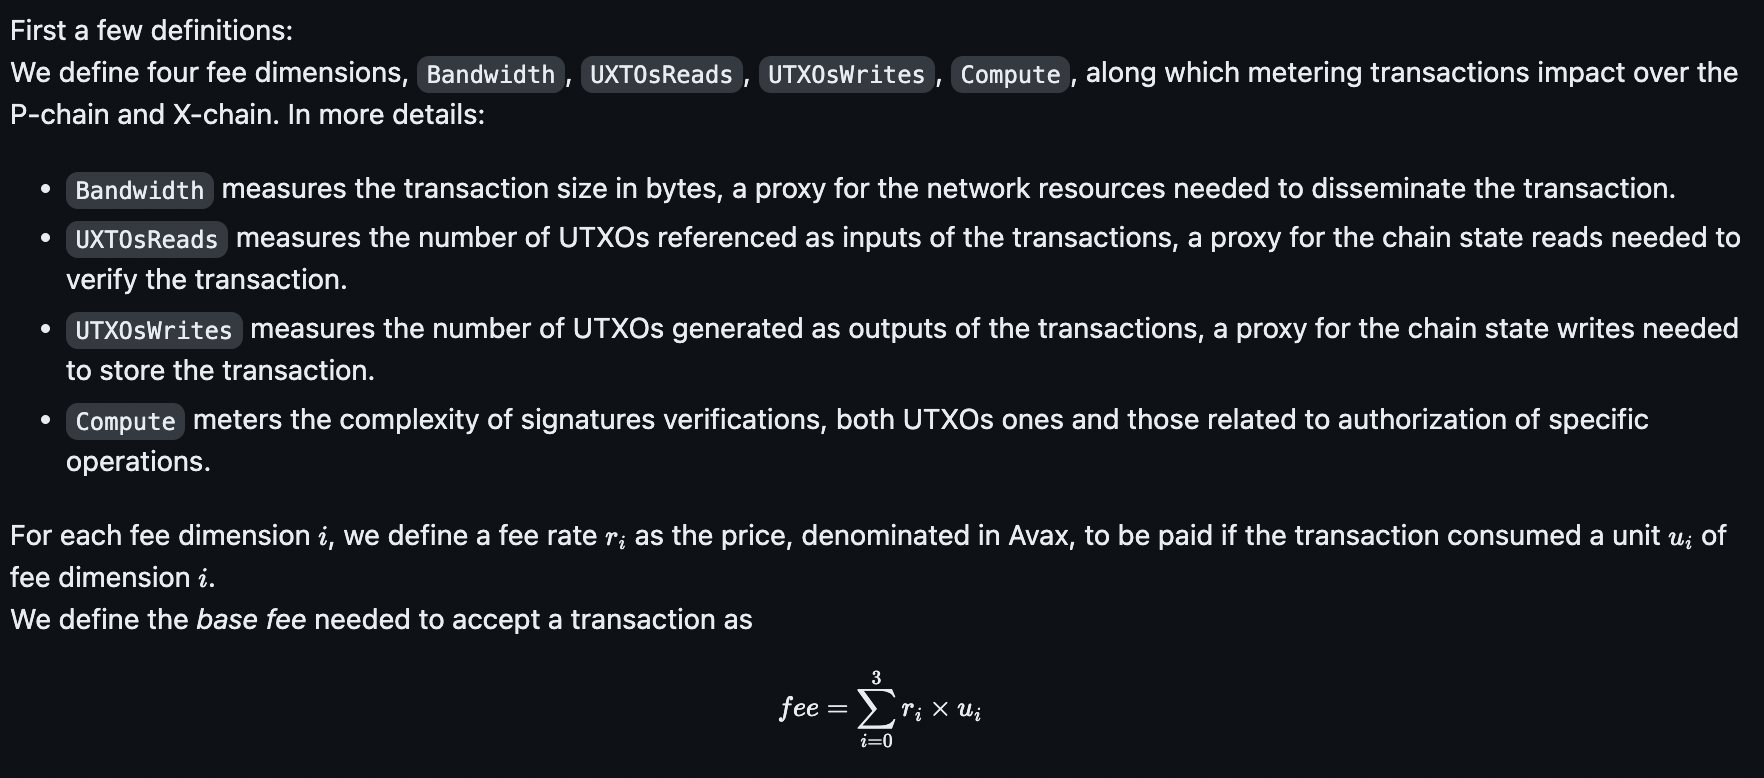

Base Fee Optimization method


In [17]:
def calculate_fee(r1, bandwidth, r2, utxoReads, r3, utxoWrites, r4, compute):
  fee = r1*bandwidth + r2*utxoReads + r3*utxoWrites + r4*compute
  return fee

fee vs bandwidth


In [19]:
mean_utxo_reads = df['UTXOsRead_Complexity'].mean()
mean_utxo_writes = df['UTXOsRead_Complexity'].mean()
mean_compute = df['Compute_Complexity'].mean()
mean_bandwidth = df['Bandwidth_Complexity'].mean()
print(mean_utxo_reads, mean_utxo_writes, mean_compute, mean_bandwidth)

20.04285634150446 20.04285634150446 203.84809558534806 60.772891307193206
